In [1]:
import pandas as pd
import numpy as np


In [2]:
data=pd.DataFrame()

In [3]:
data["X"]=1,2,3,4,5,6,7,8,9,12,14,120,160

In [4]:
data["y"]=10,20,30,40,50,60,70,80,15,25,35,400,550

In [5]:
data.shape

(13, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       13 non-null     int64
 1   y       13 non-null     int64
dtypes: int64(2)
memory usage: 336.0 bytes


In [7]:
data.describe()

,X,y
count,13.000000,13.000000
mean,27.000000,106.538462
std,50.947686,167.685030
min,1.000000,10.000000
25%,4.000000,25.000000
50%,7.000000,40.000000
75%,12.000000,70.000000
max,160.000000,550.000000


In [8]:
data.skew()

X    2.272626
y    2.259362
dtype: float64

<Axes: >

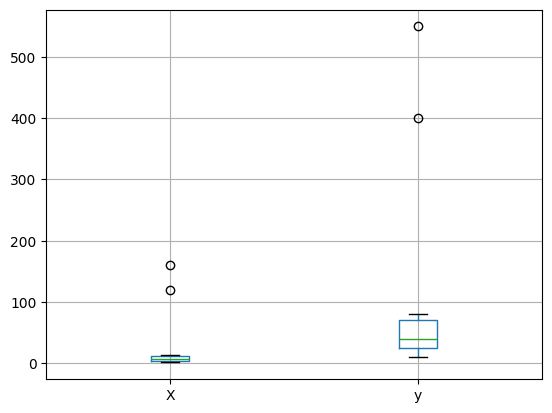

In [9]:
data.boxplot()


In [10]:
sns.histplot(data["X"],kde=True)

<IPython.core.display.Javascript object>

C:\Users\madhu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\madhu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='X', ylabel='Count'>

In [11]:
sns.histplot(data["y"],kde=True)

<IPython.core.display.Javascript object>

C:\Users\madhu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\madhu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='X', ylabel='Count'>

In [12]:
from scipy.stats import zscore

In [13]:
for i in data.columns:
    z_score=zscore(data[i])
    threshold=3
    data=data[np.abs(z_score)<threshold ]

In [14]:
data

,X,y
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50
5,6,60
6,7,70
7,8,80
8,9,15
9,12,25


In [23]:
def filtered_data(dataset):
    final_data = dataset.copy()  # Create a copy of the original DataFrame
    
    for i in dataset.columns:
        if dataset[i].dtype != "O":  # Check if the column is numeric
            q1 = dataset[i].quantile(0.25)
            q3 = dataset[i].quantile(0.75)
            IQR = q3 - q1
            lower_fence = q1 - (1.5 * IQR)
            higher_fence = q3 + (1.5 * IQR)
            final_data = final_data[(final_data[i] >= lower_fence) & (final_data[i] <= higher_fence)]
    
    return final_data


In [24]:
new_data=filtered_data(data)

In [25]:
new_data

,X,y
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50
5,6,60
6,7,70
7,8,80
8,9,15
9,12,25


In [29]:
df=pd.read_csv("iris.csv")

In [30]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
def filtered_data(dataset):
    final_data = dataset.copy()  # Create a copy of the original DataFrame
    
    for i in dataset.columns:
        if dataset[i].dtype != "O":  # Check if the column is numeric
            q1 = dataset[i].quantile(0.25)
            q3 = dataset[i].quantile(0.75)
            IQR = q3 - q1
            lower_fence = q1 - (1.5 * IQR)
            higher_fence = q3 + (1.5 * IQR)
            final_data = final_data[(final_data[i] >= lower_fence) & (final_data[i] <= higher_fence)]
    
    return final_data


In [35]:
new_df=filtered_data(df)

In [37]:
new_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [38]:
df.shape

(150, 5)